## Exploratory Data Analysis

### Quick look at the Data

In [3]:
import pandas as pd
import matplotlib as mpl
#mpl.rcParams['agg.path.chunksize'] = 10000
import matplotlib.pyplot as plt
import seaborn as sns
import os
path = os.getcwd()

Loading data into "main_df" variable

In [ ]:
#loc_data = pd.read_csv('03_LocationMaster.csv')
# prod_data = pd.read_csv(r'C:\Users\sk166\02_ProductMaster.csv')
# date_data = pd.read_csv(r'C:\Users\sk166\01_CalendarMaster.csv')
#main_df = pd.read_csv(r'C:\Users\sk166\09_Project3.csv')
main_df = pd.read_csv(r'C:\Users\sk166\MainDataFrame.csv') 

Outputting first and last 5 rows to get fimiliar with data.\
Data shows 20 columns with 43,016,599 rows. 

In [3]:
main_df.head(5)

,Date,ProductKey,LocationKey,DemandUnits,OrderedUnits,CollectedUnits,YearWeek,DayOfWeek,IsBankHoliday,IsWorkingDay,HierarchyLevel1,HierarchyLevel2,Seasonal,IsHub,LocationType1,LocationType2,Latitude,Longitude,SimpleOrderPropensity,CollectOrderPropensity
0,20180828,42972,3260,2,2,2,201835,3,False,True,71645,32668,False,False,29524,3,51.341607,0.572741,1.0,1.0
1,20180820,42972,23485,1,0,0,201834,2,False,True,71645,32668,False,False,57890,1,51.443878,0.217438,0.0,0.0
2,20180826,42972,23485,1,0,0,201835,1,False,False,71645,32668,False,False,57890,1,51.443878,0.217438,0.0,0.0
3,20180827,42972,23485,1,0,0,201835,2,True,False,71645,32668,False,False,57890,1,51.443878,0.217438,0.0,0.0
4,20170815,42972,70984,2,2,2,201733,3,False,True,71645,32668,False,False,29524,1,51.855869,-4.309183,1.0,1.0


In [4]:
main_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43016599 entries, 0 to 43016598
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Date                    int64  
 1   ProductKey              int64  
 2   LocationKey             int64  
 3   DemandUnits             int64  
 4   OrderedUnits            int64  
 5   CollectedUnits          int64  
 6   YearWeek                int64  
 7   DayOfWeek               int64  
 8   IsBankHoliday           bool   
 9   IsWorkingDay            bool   
 10  HierarchyLevel1         int64  
 11  HierarchyLevel2         int64  
 12  Seasonal                bool   
 13  IsHub                   bool   
 14  LocationType1           int64  
 15  LocationType2           int64  
 16  Latitude                float64
 17  Longitude               float64
 18  SimpleOrderPropensity   float64
 19  CollectOrderPropensity  float64
dtypes: bool(4), float64(4), int64(12)
memory usage: 5.3 GB


In [ ]:
corr = main_df.corr()
corr["SimpleOrderPropensity"].sort_values(ascending=False)

In [ ]:
corr["CollectOrderPropensity"].sort_values(ascending=False)

Basic statistics of products demand, order, collection and propensities...

In [8]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
main_df.loc[:, ["DemandUnits", "OrderedUnits", "CollectedUnits", 
                "SimpleOrderPropensity", "CollectOrderPropensity"]].describe()


,DemandUnits,OrderedUnits,CollectedUnits,SimpleOrderPropensity,CollectOrderPropensity
count,43016599.00,43016599.00,43016599.00,43016599.00,43016599.00
mean,1.14,0.91,0.69,0.80,0.62
std,0.70,0.78,0.65,0.39,0.48
min,1.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,0.00,1.00,0.00
50%,1.00,1.00,1.00,1.00,1.00
75%,1.00,1.00,1.00,1.00,1.00
max,580.00,580.00,294.00,4.00,3.33


It can be seen that average (mean) deamand of units is greater than average orders, and that greater than average units collection.
_______________________________________________________________________________________

There have been 65,160 different type of products in Argos inventory being sold across 1,247 stores in 3 years time span!

In [9]:
main_df.ProductKey.value_counts()

28152    16900
63886    15916
61980    15879
55943    15516
42283    15190
         ...  
72782        1
1932         1
34714        1
67495        1
76894        1
Name: ProductKey, Length: 65160, dtype: int64

In [10]:
main_df.LocationKey.value_counts()

25194    195916
72448    166560
26800    155710
67378    152407
39596    146126
          ...  
21726        21
58455        20
14920        15
60269        15
1873         11
Name: LocationKey, Length: 1247, dtype: int64

Product hierarchy by type of products. Examples of this hierarchy level include Kettles, Televisions, Bedsheets

In [27]:
len(main_df["HierarchyLevel1"].value_counts())

181

HierarchyLevel1 maps many-to-one to HierarchyLevel2. Examples of this hierarchy level include Household Electricals, Technology, Furniture

In [28]:
len(main_df["HierarchyLevel2"].value_counts())

26

Classifies locations by their shop-front type. Examples include High Street, Retail Park, Within Supermarket

In [3]:
len(main_df["LocationType1"].value_counts())

7

Classifies locations by their surrounding area. Examples include Town Centre, Rural, Destination Shopping Centre

In [4]:
len(main_df["LocationType2"].value_counts())

3

Order propensities are continious numerical values, 33970101 units have been ordered as same as their demand, meanwhile 7985644 units had no or some demand but were not ordered. 

26020096 units have been collected as same as their demand, meanwhile 15677408 units had no or some demand but were not collected i.e. might not have been ordered aswell. 

## Univariate Analysis

### Graph Plots for Categorical Variables 
<!-- Each plot corresponds to different product demands on various days/dates during the 3 year time span. \ -->
Each date has atleast a minimum (1 unit) demand for specific product even if amount of order or collection is zero.

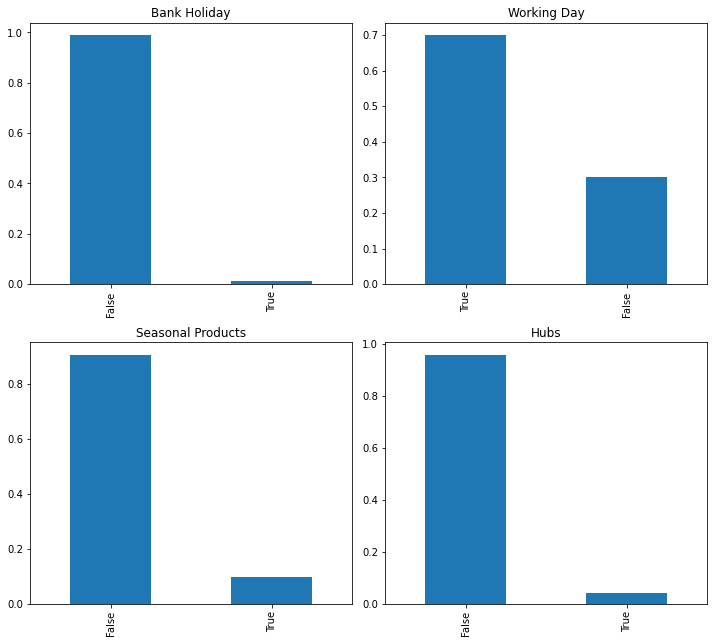

In [56]:
plt.subplot(321)
main_df.IsBankHoliday.value_counts(normalize=True).plot(kind="bar", title="Bank Holiday", figsize=(10,13))
plt.tight_layout(pad=1)
plt.subplot(322)
main_df.IsWorkingDay.value_counts(normalize=True).plot(kind="bar", title="Working Day")
plt.tight_layout(pad=1)
plt.subplot(323)
main_df.Seasonal.value_counts(normalize=True).plot(kind="bar", title="Seasonal Products")
plt.tight_layout(pad=1)
plt.subplot(324)
main_df.IsHub.value_counts(normalize=True).plot(kind="bar", title="Hubs")
plt.tight_layout(pad=1)

### Graph Plots for Products

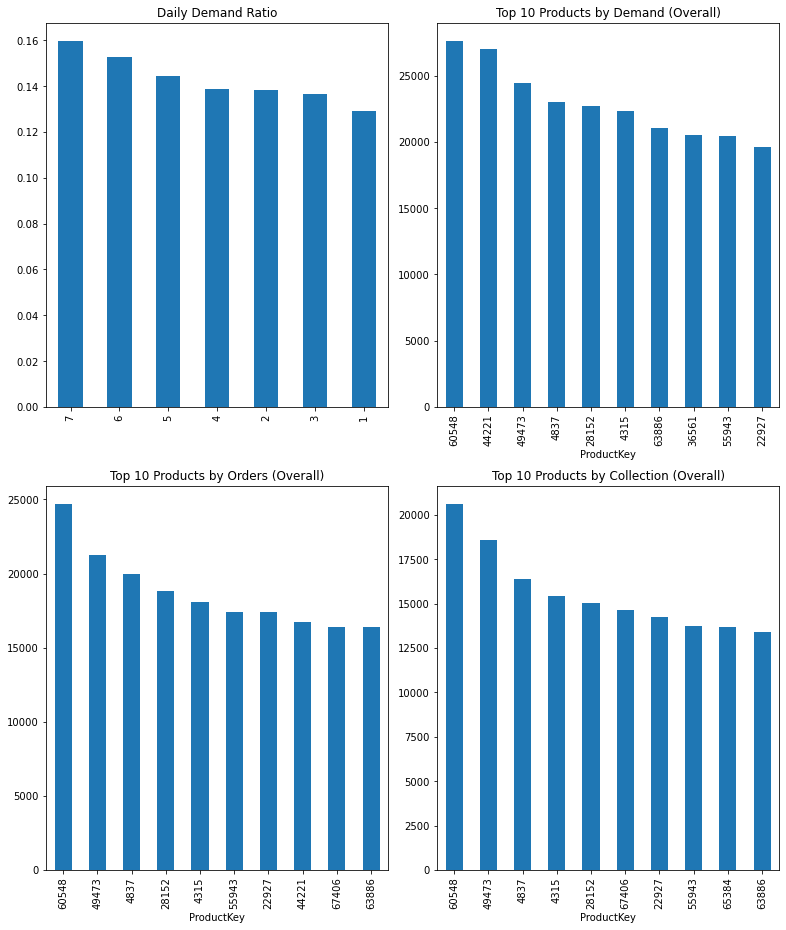

In [3]:
plt.subplot(221)
main_df.DayOfWeek.value_counts(normalize=True).plot(kind="bar",title="Daily Demand Ratio",figsize=(11,13))
plt.tight_layout(pad=1)
plt.subplot(222)
main_df.groupby("ProductKey").DemandUnits.sum().sort_values(ascending=False).head(10).plot(
    kind="bar",title="Top 10 Products by Demand (Overall)")
plt.tight_layout(pad=1)
plt.subplot(223)
main_df.groupby("ProductKey").OrderedUnits.sum().sort_values(ascending=False).head(10).plot(
    kind="bar",title="Top 10 Products by Orders (Overall)")
plt.tight_layout(pad=1)
plt.subplot(224)
main_df.groupby("ProductKey").CollectedUnits.sum().sort_values(ascending=False).head(10).plot(
    kind="bar",title="Top 10 Products by Collection (Overall)")
plt.tight_layout(pad=1)

### Graph plots for location specific data

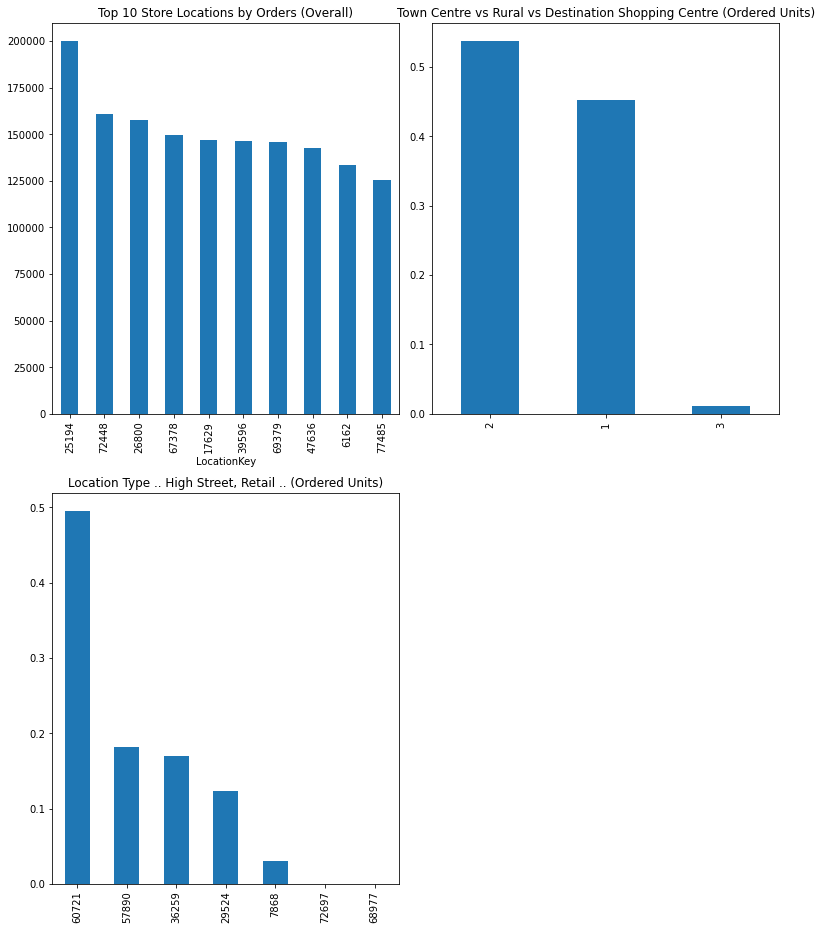

In [8]:
plt.subplot(221)
main_df.groupby("LocationKey").OrderedUnits.sum().sort_values(ascending = False).head(10).plot(
    kind="bar", title="Top 10 Store Locations by Orders (Overall)", figsize=(11,13))
plt.tight_layout(pad=1)
plt.subplot(222)
main_df.LocationType2.value_counts(normalize = True).plot(
    kind="bar", title="Town Centre vs Rural vs Destination Shopping Centre")
plt.tight_layout(pad=1)
plt.subplot(223)
main_df.LocationType1.value_counts(normalize = True).plot(
    kind="bar", title="Location Type .. High Street, Retail Park ..")
plt.tight_layout(pad=1)

### Graph Plots for Continious Variables 

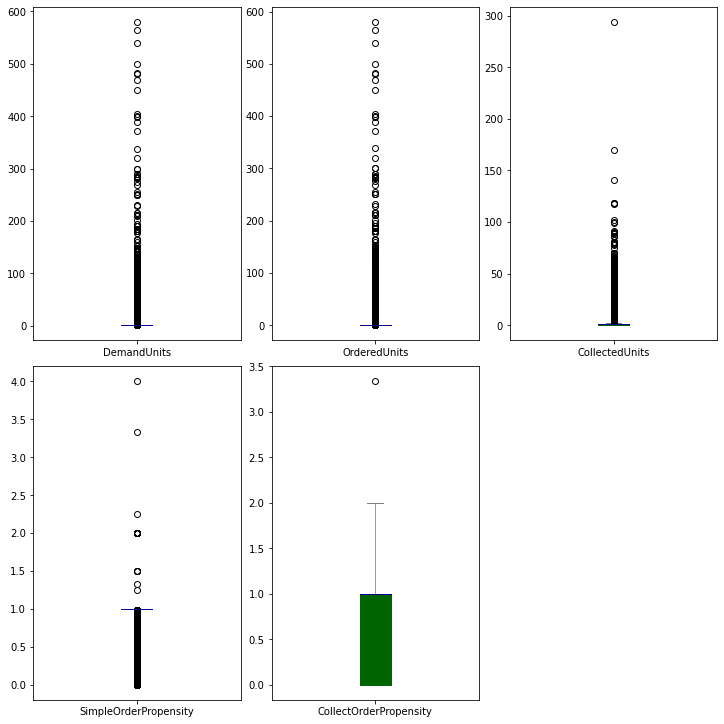

In [6]:
plt.subplot(231)
main_df["DemandUnits"].plot.box(figsize=(10,10))
plt.tight_layout(pad=0.5)
plt.subplot(232)
main_df["OrderedUnits"].plot.box()
plt.tight_layout(pad=0.5)
plt.subplot(233)
main_df["CollectedUnits"].plot.box()
plt.tight_layout(pad=0.5)
# main_df.boxplot(column=['DemandUnits', 'OrderedUnits', 'CollectedUnits'])
plt.subplot(234)
main_df["SimpleOrderPropensity"].plot.box()
plt.tight_layout(pad=0.5)
plt.subplot(235)
main_df["CollectOrderPropensity"].plot.box()
plt.tight_layout(pad=0.5)

In [10]:
main_df.SimpleOrderPropensity.value_counts()

1.000000    33970101
0.000000     7985644
0.500000      857062
0.666667       79771
0.333333       69325
              ...   
0.318182           1
0.055556           1
0.931034           1
0.140351           1
0.989362           1
Name: SimpleOrderPropensity, Length: 236, dtype: int64

In [ ]:
main_df.CollectOrderPropensity.value_counts()